In [88]:
library(caret)
library(dplyr)
library(car)
library(corrplot)

In [89]:
datos <- read.csv("Train bank.csv")
head(datos)

,X,Age,Job,Marital.Status,Education,Credit,Balance..euros.,Housing.Loan,Personal.Loan,Contact,Last.Contact.Day,Last.Contact.Month,Last.Contact.Duration,Campaign,Pdays,Previous,Poutcome,Subscription
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
1,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
2,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
3,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
4,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0


In [100]:

dim(datos)

[1] 31648    18

## Correlacion variables numericas

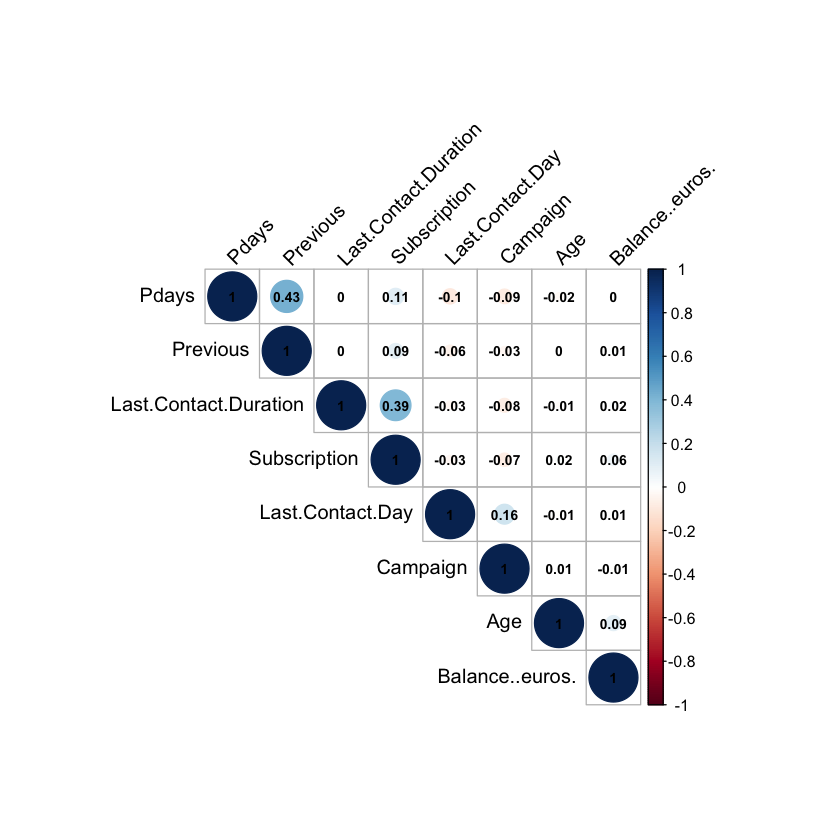

In [113]:
# Correlacion variables numericas
par(bg = "white")
variables_numericas <- c("Age", "Balance..euros.", "Last.Contact.Day", "Last.Contact.Duration", "Campaign", "Pdays", "Previous", "Subscription")
datos_numericos <- datos[, variables_numericas]

# Calcular la matriz de correlación
cor_data <- cor(datos_numericos, use = "complete.obs")


# Crear el gráfico de correlación
corrplot(cor_data, method = "circle", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45, addCoef.col = "black", number.cex = 0.7)


No se observa una correlacion fuerte en tre la mayoria de las variables numericas, sin embargo para la variable LastContactDuration tiene una correlacion positiva con Suscription. De igual forma podemos observar una correlacion moderada entre Pdays y Previous.

## Transformacion de variables categoricas

In [114]:
# Convertir variables categóricas en factores
datos$Job <- as.factor(datos$Job)
datos$Marital.Status <- as.factor(datos$Marital.Status)
datos$Education <- as.factor(datos$Education)
datos$Contact <- as.factor(datos$Contact)
datos$Last.Contact.Month <- as.factor(datos$Last.Contact.Month)
datos$Poutcome <- as.factor(datos$Poutcome)


In [115]:
# Crear variables dummy
datos_dummies <- model.matrix(~ Job + Marital.Status + Education + Contact + Last.Contact.Month + Poutcome, data = datos)[, -1]


In [116]:
head(datos_dummies)

,Jobblue-collar,Jobentrepreneur,Jobhousemaid,Jobmanagement,Jobretired,Jobself-employed,Jobservices,Jobstudent,Jobtechnician,Jobunemployed,...,Last.Contact.Monthjul,Last.Contact.Monthjun,Last.Contact.Monthmar,Last.Contact.Monthmay,Last.Contact.Monthnov,Last.Contact.Monthoct,Last.Contact.Monthsep,Poutcomeother,Poutcomesuccess,Poutcomeunknown
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [117]:
# Seleccionar variables numéricas
datos_numeric <- datos[, c("Age", "Credit", "Balance..euros.", "Housing.Loan", "Personal.Loan", "Last.Contact.Day", "Last.Contact.Duration", "Campaign", "Pdays", "Previous", "Subscription")]

# Convertir variables binarias a numéricas (0/1)
datos_numeric$Credit <- ifelse(datos_numeric$Credit == "yes", 1, 0)
datos_numeric$Housing.Loan <- ifelse(datos_numeric$Housing.Loan == "yes", 1, 0)
datos_numeric$Personal.Loan <- ifelse(datos_numeric$Personal.Loan == "yes", 1, 0)

# Combinar las variables dummy y numéricas
datos_final <- cbind(datos_numeric, datos_dummies)

In [118]:
head(datos_final)

,Age,Credit,Balance..euros.,Housing.Loan,Personal.Loan,Last.Contact.Day,Last.Contact.Duration,Campaign,Pdays,Previous,...,Last.Contact.Monthjul,Last.Contact.Monthjun,Last.Contact.Monthmar,Last.Contact.Monthmay,Last.Contact.Monthnov,Last.Contact.Monthoct,Last.Contact.Monthsep,Poutcomeother,Poutcomesuccess,Poutcomeunknown
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [119]:
dim(datos_final)
names(datos_final)
unique(datos_final$Subscription)

[1] 31648    43

[1] "Age"                   "Credit"                "Balance..euros."      
 [4] "Housing.Loan"          "Personal.Loan"         "Last.Contact.Day"     
 [7] "Last.Contact.Duration" "Campaign"              "Pdays"                
[10] "Previous"              "Subscription"          "Jobblue-collar"       
[13] "Jobentrepreneur"       "Jobhousemaid"          "Jobmanagement"        
[16] "Jobretired"            "Jobself-employed"      "Jobservices"          
[19] "Jobstudent"            "Jobtechnician"         "Jobunemployed"        
[22] "Jobunknown"            "Marital.Statusmarried" "Marital.Statussingle" 
[25] "Educationsecondary"    "Educationtertiary"     "Educationunknown"     
[28] "Contacttelephone"      "Contactunknown"        "Last.Contact.Monthaug"
[31] "Last.Contact.Monthdec" "Last.Contact.Monthfeb" "Last.Contact.Monthjan"
[34] "Last.Contact.Monthjul" "Last.Contact.Monthjun" "Last.Contact.Monthmar"
[37] "Last.Contact.Monthmay" "Last.Contact.Monthnov" "Last.Contact.Monthoct"
[40] "Last.Contact.Monthsep" "Poutcomeother"         "Poutcomesuccess"      
[43] "Poutcomeunknown"

[1] 0 1

In [120]:
subscription_counts <- table(datos_final$Subscription)
print(subscription_counts)



    0     1 
27951  3697 


## Matriz correlacion con variables categoricas

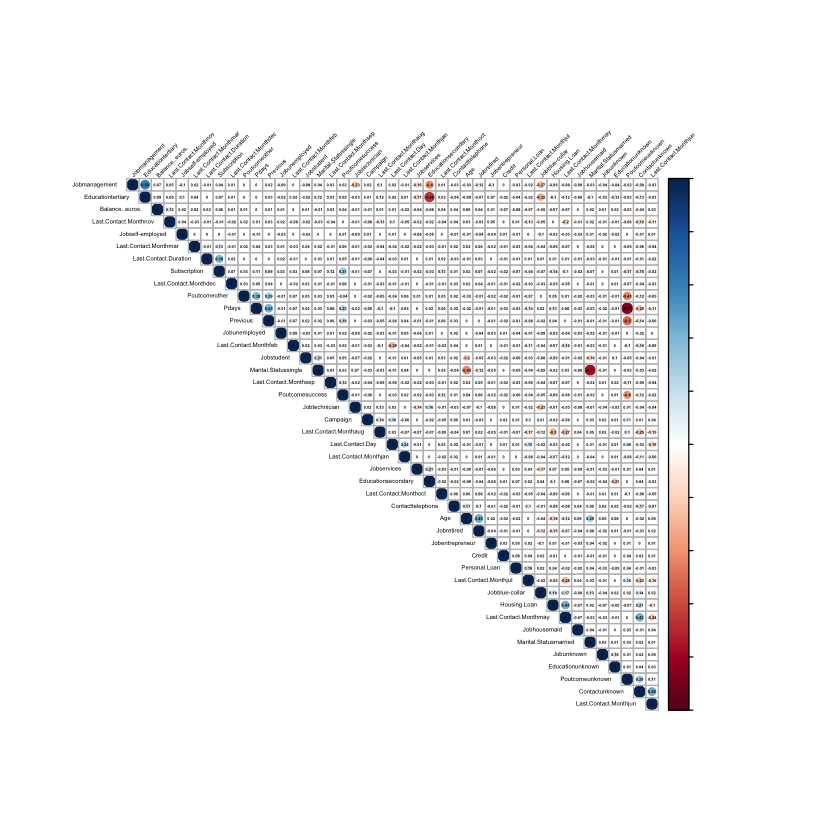

In [124]:
# Ajustar el fondo del gráfico
par(bg = "white")

# Ajustar el tamaño del gráfico y el tamaño del texto
par(mar = c(4, 4, 2, 2), oma = c(2, 2, 2, 2))  # Ajusta márgenes

# Crear la matriz de correlación
cor_data <- cor(datos_final, use = "complete.obs")

# Crear el gráfico de correlación
corrplot(cor_data, method = "circle", type = "upper", order = "hclust",
         tl.col = "black",  # Color de las etiquetas
         tl.srt = 45,       # Ángulo de las etiquetas
         addCoef.col = "black", # Color de los números de correlación
         number.cex = 0.2,  # Tamaño de los números de correlación
         tl.cex = 0.3,      # Tamaño de las etiquetas de las variables
         cl.cex = 0.01)      # Tamaño del texto en la leyenda de color

Podemos evidenciar correlacion negativas  altas entre algunas de las variables:

EducationSecondary - Educationtertiary -> Correlacion negativa alta

Poutcomeunkwon - Pdays -> Correlacion negativa alta

Marital.Statusmarried - Marital.Statussingle -> Correlacion negativa alta


# Modelo con todas las variables

In [150]:
glm.fit <- glm(Subscription ~ ., family = binomial, data = datos_final)
glm.probs = predict(glm.fit, type = "response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs>0.5] = 1
summary(glm.fit)
print("Matriz confusion")
table(glm.pred, datos_final$Subscription)


Call:
glm(formula = Subscription ~ ., family = binomial, data = datos_final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8747  -0.3798  -0.2555  -0.1499   3.5446  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.543e+00  2.188e-01 -11.625  < 2e-16 ***
Age                    1.983e-03  2.644e-03   0.750 0.453315    
Credit                -8.217e-03  1.903e-01  -0.043 0.965561    
Balance..euros.        1.510e-05  5.976e-06   2.527 0.011501 *  
Housing.Loan          -6.850e-01  5.249e-02 -13.050  < 2e-16 ***
Personal.Loan         -4.207e-01  7.197e-02  -5.845 5.07e-09 ***
Last.Contact.Day       7.511e-03  2.977e-03   2.523 0.011644 *  
Last.Contact.Duration  4.175e-03  7.743e-05  53.920  < 2e-16 ***
Campaign              -1.009e-01  1.236e-02  -8.158 3.41e-16 ***
Pdays                  9.643e-05  3.660e-04   0.263 0.792190    
Previous               8.923e-03  6.491e-03   1.375 0.169214    
`Jobblue-coll

[1] "Matriz confusion"


        
glm.pred     0     1
       0 27288  2437
       1   663  1260

### Predicciones con los mismos datos de entranamiento - Validacion AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases



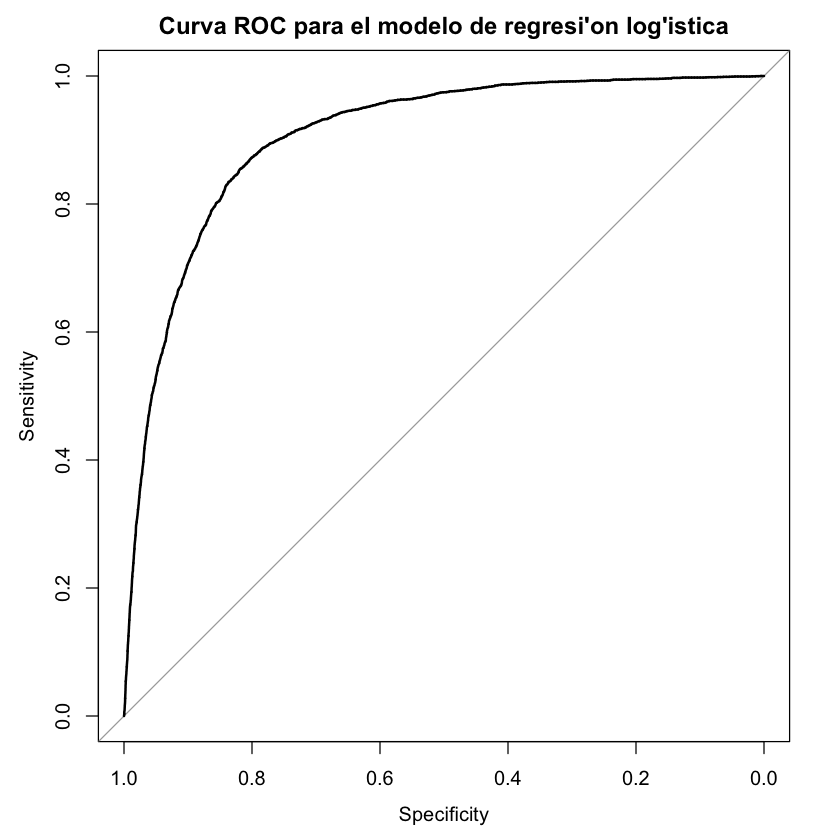

In [127]:
library(pROC)

par(bg = "white")
# Ajustar el modelo de regresión logística
glm.fit <- glm(Subscription ~ ., family = binomial, data = datos_final)

# Calcular las probabilidades predichas
glm.probs <- predict(glm.fit, type = "response")

# Calcular la curva ROC
roc_curve <- roc(response = datos_final$Subscription, predictor = glm.probs)

# Graficar la curva ROC
plot(roc_curve, main = "Curva ROC para el modelo de regresión logística")

In [128]:
auc_value <- auc(roc_curve)
print(auc_value)


Area under the curve: 0.905


# Modelo retirando variables con correlacion (variables retiradas: Pdays, Educationsecondary y Marital.Statusmarried)

In [149]:
datos_final2 <- subset(datos_final, select = -c(Pdays, Educationsecondary, Marital.Statusmarried))
names(datos_final)
dim(datos_final2)


[1] "Age"                   "Credit"                "Balance..euros."      
 [4] "Housing.Loan"          "Personal.Loan"         "Last.Contact.Day"     
 [7] "Last.Contact.Duration" "Campaign"              "Pdays"                
[10] "Previous"              "Subscription"          "Jobblue-collar"       
[13] "Jobentrepreneur"       "Jobhousemaid"          "Jobmanagement"        
[16] "Jobretired"            "Jobself-employed"      "Jobservices"          
[19] "Jobstudent"            "Jobtechnician"         "Jobunemployed"        
[22] "Jobunknown"            "Marital.Statusmarried" "Marital.Statussingle" 
[25] "Educationsecondary"    "Educationtertiary"     "Educationunknown"     
[28] "Contacttelephone"      "Contactunknown"        "Last.Contact.Monthaug"
[31] "Last.Contact.Monthdec" "Last.Contact.Monthfeb" "Last.Contact.Monthjan"
[34] "Last.Contact.Monthjul" "Last.Contact.Monthjun" "Last.Contact.Monthmar"
[37] "Last.Contact.Monthmay" "Last.Contact.Monthnov" "Last.Contact.Monthoct"
[40] "Last.Contact.Monthsep" "Poutcomeother"         "Poutcomesuccess"      
[43] "Poutcomeunknown"

[1] 31648    40

In [151]:
glm.fit <- glm(Subscription ~ ., family = binomial, data = datos_final2)
glm.probs = predict(glm.fit, type = "response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs>0.5] = 1
summary(glm.fit)
print("Matriz confusion")
table(glm.pred, datos_final2$Subscription)


Call:
glm(formula = Subscription ~ ., family = binomial, data = datos_final2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8771  -0.3801  -0.2556  -0.1503   3.5042  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.477e+00  1.688e-01 -14.680  < 2e-16 ***
Age                    1.828e-03  2.618e-03   0.698 0.484939    
Credit                 2.077e-03  1.902e-01   0.011 0.991288    
Balance..euros.        1.479e-05  5.978e-06   2.474 0.013355 *  
Housing.Loan          -6.827e-01  5.230e-02 -13.053  < 2e-16 ***
Personal.Loan         -4.155e-01  7.190e-02  -5.778 7.55e-09 ***
Last.Contact.Day       7.564e-03  2.975e-03   2.542 0.011007 *  
Last.Contact.Duration  4.176e-03  7.737e-05  53.972  < 2e-16 ***
Campaign              -1.016e-01  1.238e-02  -8.212  < 2e-16 ***
Previous               8.649e-03  6.456e-03   1.340 0.180300    
`Jobblue-collar`      -3.181e-01  8.410e-02  -3.783 0.000155 ***
Jobentrepren

[1] "Matriz confusion"


        
glm.pred     0     1
       0 27290  2440
       1   661  1257

### Predicciones con los mismos datos de entranamiento - Validacion AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases



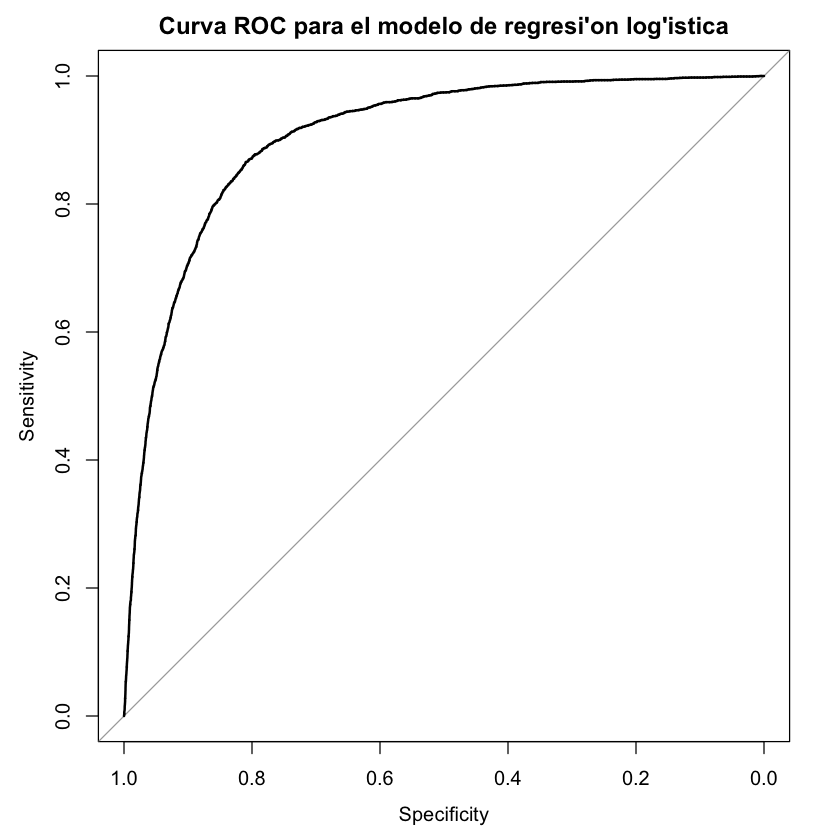

In [141]:
library(pROC)

par(bg = "white")
# Ajustar el modelo de regresión logística
glm.fit <- glm(Subscription ~ ., family = binomial, data = datos_final2)

# Calcular las probabilidades predichas
glm.probs <- predict(glm.fit, type = "response")

# Calcular la curva ROC
roc_curve <- roc(response = datos_final2$Subscription, predictor = glm.probs)

# Graficar la curva ROC
plot(roc_curve, main = "Curva ROC para el modelo de regresión logística")

In [142]:
auc_value <- auc(roc_curve)
print(auc_value)

Area under the curve: 0.9049


# Predicciones para competencia Kaggle con datos de prueba

In [146]:
test_data <- read.csv("Test bank.csv")


In [147]:
# Convertir variables categóricas en factores
test_data$Job <- as.factor(test_data$Job)
test_data$Marital.Status <- as.factor(test_data$Marital.Status)
test_data$Education <- as.factor(test_data$Education)
test_data$Contact <- as.factor(test_data$Contact)
test_data$Last.Contact.Month <- as.factor(test_data$Last.Contact.Month)
test_data$Poutcome <- as.factor(test_data$Poutcome)

# Crear variables dummy
datos_dummies <- model.matrix(~ Job + Marital.Status + Education + Contact + Last.Contact.Month + Poutcome,  data = test_data)[, -1]

# Seleccionar variables numéricas
datos_numeric <- test_data[, c("Age", "Credit", "Balance..euros.", "Housing.Loan", "Personal.Loan", "Last.Contact.Day", "Last.Contact.Duration", "Campaign", "Pdays", "Previous")]

# Convertir variables binarias a numéricas (0/1)
datos_numeric$Credit <- ifelse(datos_numeric$Credit == "yes", 1, 0)
datos_numeric$Housing.Loan <- ifelse(datos_numeric$Housing.Loan == "yes", 1, 0)
datos_numeric$Personal.Loan <- ifelse(datos_numeric$Personal.Loan == "yes", 1, 0)

# Combinar las variables dummy y numéricas
datos_final_test <- cbind(datos_numeric, datos_dummies)


In [148]:

# Hacer predicciones en el conjunto de datos de prueba
test_probs <- predict(glm.fit, newdata = datos_final_test, type = "response")
test_results <- data.frame(Id = test_data$X, Predicted = test_probs)

# Exportar a un archivo CSV
write.csv(test_results, "Test_probabilities.csv", row.names = FALSE)


